# Pandas
Pandas is a famous library that we will use extensively during the course. It is useful for manipulating data.

In [1]:
import numpy as np
import pandas as pd

### Creating data

**Creating a Pandas Series** <br>
A pandas series is like a column in a table.

In [2]:
a = [1,2,3]
col = pd.Series([1,2,3]) 
print(col)
col = pd.Series(a, index = ["x", "y", "z"]) #we can add an index to the pd series
print(col)

0    1
1    2
2    3
dtype: int64
x    1
y    2
z    3
dtype: int64


In [3]:
calories = {"day1": 420, "day2": 380, "day3": 390}
col = pd.Series(calories)
print(col)

day1    420
day2    380
day3    390
dtype: int64


**Data frames** <br>
Since data is usually multidimensional, Pandas store data in the form of multidimensional data called dataframes.

In [4]:
#Create a dataframe 
mydataset = {
  'fruits': ["Bananas", "Apples", "Oranges"],
  'quantity': [3, 7, 2], 
  'color': ['Yellow', 'Red', 'Orange']
    
}

data = pd.DataFrame(mydataset)

In [5]:
#view the dataframe
data.head()

,fruits,quantity,color
0,Bananas,3,Yellow
1,Apples,7,Red
2,Oranges,2,Orange


### Now, we will work on a real dataset

Usually when we work in a dataset, we are intersted in checking the following:
- Look at the whole dataset, # of rows/columns, check data types.
- Check for duplicates or null data
- Do some analysis to uderstand our data more; we can do that by checking different statistics or by using plots.
- Identify the relevant columns for our investigation.

You can check this [notebook](https://www.kaggle.com/debshishughosh/modified-titanic-dataset-analysis) if you wanna see more analysis done on this data.

In [6]:
#read dataset
raw_data = pd.read_csv('titanic.csv')
data= raw_data.copy(deep=True) #it is always a good practise to keep a copy of the original data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
data.shape

(418, 12)

In [8]:
#check info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
#check for duplicates
data.duplicated().sum()

0

In [10]:
#check if there are null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
#some statistics regarding the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
#check specific columns
data[['Age']]
#data[['Age','Survived']]

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
413,NaN
414,39.0
415,38.5
416,NaN


In [25]:
#check categorical data counts
data['Pclass'].v
alue_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [14]:
#filter data based on a condition
data[data['Survived']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S


In [15]:
data[(data['Survived']==1) & (data['Pclass']==1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C


In [16]:
#drop a column
data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


<AxesSubplot:>

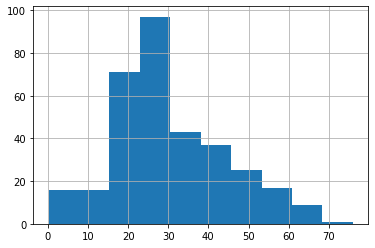

In [17]:
#Plots using Pandas
data['Age'].hist()

# Seaborn
Seaborn is used for visualizing data. We can plot heat maps, bar plots, cat plots, box plots, ..etc using Seaborn.

In [18]:
import seaborn as sns

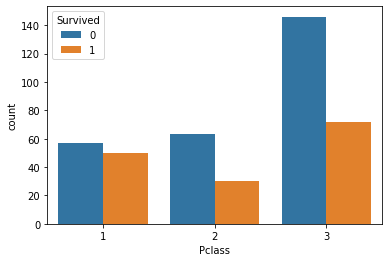

In [43]:
#countplot
sns.countplot(x='Pclass', data=data, hue='Survived');

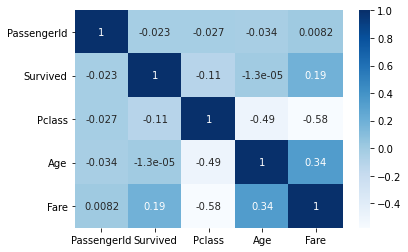

In [38]:
#heatmap
sns.heatmap(data.corr(), annot = True, cmap = 'Blues'); 

# Sklearn
Sklearn is the most useful and robust library used in Python for machine learning. 

**Contains Datasets to use**

In [143]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
iris = datasets.load_iris()
digits = datasets.load_digits()

In [144]:
#print(iris)
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [145]:
#print(digits)
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


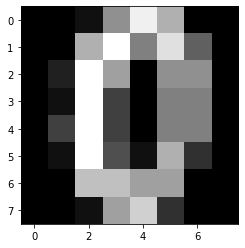

In [162]:
# pick a sample digit to plot
image = digits.images[10] # plot a sample
plt.imshow(image, cmap='gray')
plt.show()

**Operations to perform on your data using sklearn**

In [54]:
from sklearn import preprocessing

In [117]:
#label encoding
x = [[11, "Spain"], [22, "France"], [33, "Spain"], [44, "Germany"], [55, "France"]]
encoder = preprocessing.LabelEncoder()
encoded_values = encoder.fit_transform(np.array(x)[:,1])
print(encoded_values)

[2 0 2 1 0]


In [125]:
#one hot encoding
x = [[11, "Spain"], [22, "France"], [33, "Spain"], [44, "Germany"], [55, "France"]]
encoder = preprocessing.OneHotEncoder()
encoded_values = encoder.fit_transform(np.array(x)[:,1].reshape(-1,1)).toarray()
encoded_values

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [140]:
# Normalization of data between 0 and 1 => y = (x – min) / (max – min)
data = np.array([[100, 0.001],
                [8, 0.05],
                [50, 0.005],
                [88, 0.07],
                [4, 0.1]])
print(data)
# define min max scaler
scaler = preprocessing.MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


In [142]:
# Standardization of data => y = (x – mean) / standard deviation
data = np.array([[100, 0.001],
                [8, 0.05],
                [50, 0.005],
                [88, 0.07],
                [4, 0.1]])
print(data)
# define min max scaler
scaler = preprocessing.StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]
